In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Initial Version: Basic Contour Detection with Thresholding

## While it works in some cases, the result often contains noise, broken contours, or irrelevant small areas

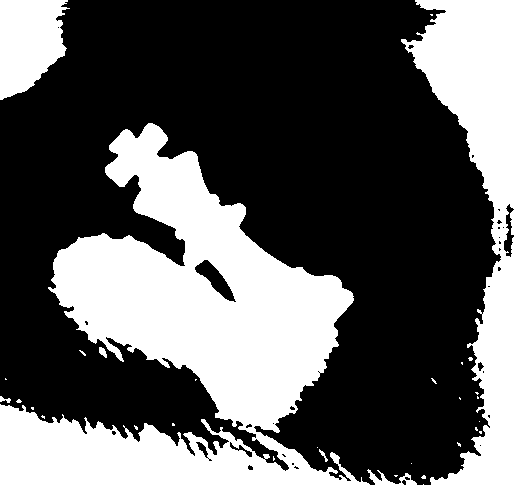

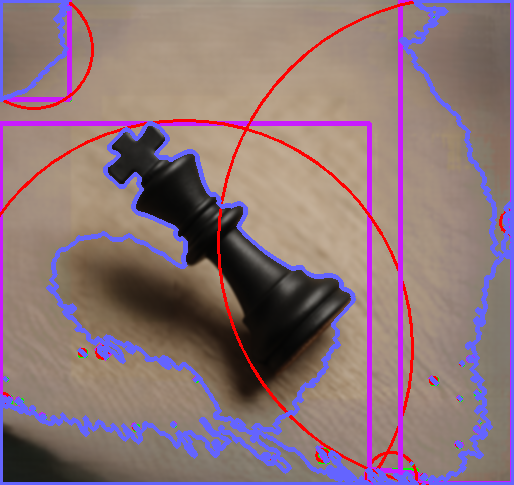

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img_path = '/content/drive/My Drive/img22.png'

img = cv2.imread(img_path)
img = cv2.GaussianBlur(img, (5,5) , 0)

ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY),
     127 , 255, cv2.THRESH_BINARY_INV )
cv2_imshow(thresh)

contours, hier = cv2.findContours(thresh,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
        # find bounding box coordinates
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

        # ّFind min Area
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(img , [box],0 , (255,27,200) , 3)

        #ّ Calculate Center and radius of min enclosing circle
        (x,y),radius = cv2.minEnclosingCircle(c)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(img,center,radius,(0,0,255),2)
cv2.drawContours(img, contours, -1, (255, 100, 100), 4)
cv2_imshow(img)



## ✅ Improved Version: Otsu's Thresholding + Morphological Operations

This version uses Otsu's method for automatic threshold selection and applies a morphological closing operation to reduce noise and close small holes.

Contours are then filtered based on area to focus only on significant objects.

**Benefits:**
- Cleaner segmentation
- Fewer false contours
- Better bounding box and enclosing shape accuracy

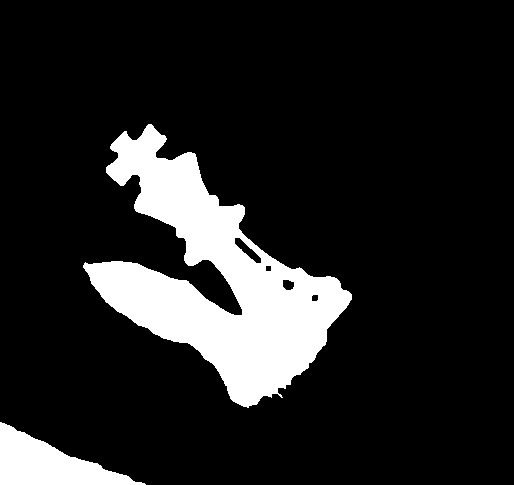

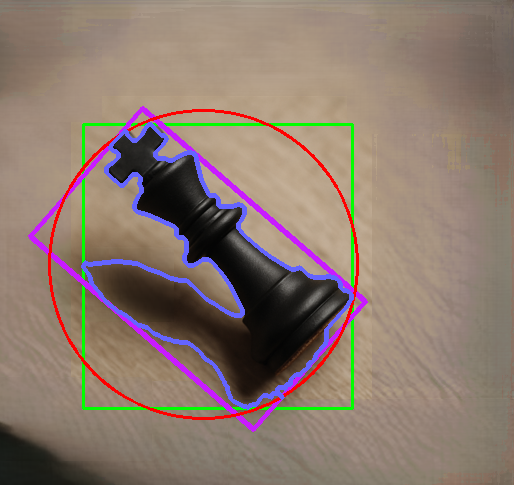

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img_path = '/content/drive/My Drive/img22.png'
img = cv2.imread(img_path)
img_copy = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
thresh_clean = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(thresh_clean)

contours, _ = cv2.findContours(thresh_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filtered = [c for c in contours if cv2.contourArea(c) > 2000]

if filtered:
    largest = max(filtered, key=cv2.contourArea)

    x, y, w, h = cv2.boundingRect(largest)
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    rect = cv2.minAreaRect(largest)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    cv2.drawContours(img_copy, [box], 0, (255, 27, 200), 3)

    (x, y), radius = cv2.minEnclosingCircle(largest)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img_copy, center, radius, (0, 0, 255), 2)

    cv2.drawContours(img_copy, [largest], -1, (255, 100, 100), 4)
else:
    print("❌ No valid contour found!")

cv2_imshow(img_copy)
